In [9]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [6]:
link="https://www.worldometers.info/world-population/population-by-country/"

In [1]:
response=requests.get(link)

In [2]:
html_content=response.content
response.text

In [3]:
soup=BeautifulSoup(html_content)

In [4]:
title=soup.find_all("title") 
title

In [ ]:
population_table=soup.find("tbody")

In [ ]:
population_table

In [ ]:
rows=population_table.find_all("tr",style="")
rows

In [ ]:
population_info=[]
for i in rows:
    col=i.find_all("td")
    country_info=[c.text for c in col]
    population_info.append(country_info)

In [ ]:
population_info

In [ ]:
sr_no=[]
country=[]
population=[]
yearly_change=[]
net_change=[]
density=[]
land_area=[]
migrants=[]
fert_rate=[]
med_age=[]
urban_pop=[]
world_share=[]
for i in population_info:
    sr_no.append(i[0])
    country.append(i[1])
    population.append(i[2])
    yearly_change.append(i[3])
    net_change.append(i[4])
    density.append(i[5])
    land_area.append(i[6])
    migrants.append(i[7])
    fert_rate.append(i[8])
    med_age.append(i[9])
    urban_pop.append(i[10])
    world_share.append(i[11])

In [ ]:
world_share

In [ ]:
data={"Sr_No.":sr_no,
      "Country(or dependency)":country,
      "Population(2020)":population,
      "Yearly_Change":yearly_change,
      "Net_change":net_change,
      "Density":density,
      "Land_Area":land_area,
      "Migrants(net)":migrants,
      "Fert_Rate":fert_rate,
      "Med_Age":med_age,
      "Urban_POP%":urban_pop,
      "World_Share":world_share
      }

In [89]:
df=pd.DataFrame(data)

In [88]:
df.to_csv("worldpopulation2022")

In [102]:
df=pd.read_csv("worldpopulation2022")

In [103]:
df

,Unnamed: 0,Sr_No.,Country(or dependency),Population(2020),Yearly_Change,Net_change,Density,Land_Area,Migrants(net),Fert_Rate,Med_Age,Urban_POP%,World_Share
0,0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,4,5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,230,231,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
231,231,232,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
232,232,233,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
233,233,234,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              235 non-null    int64 
 1   Sr_No.                  235 non-null    int64 
 2   Country(or dependency)  235 non-null    object
 3   Population(2020)        235 non-null    object
 4   Yearly_Change           235 non-null    object
 5   Net_change              235 non-null    object
 6   Density                 235 non-null    object
 7   Land_Area               235 non-null    object
 8   Migrants(net)           235 non-null    object
 9   Fert_Rate               235 non-null    object
 10  Med_Age                 235 non-null    object
 11  Urban_POP%              235 non-null    object
 12  World_Share             235 non-null    object
dtypes: int64(2), object(11)
memory usage: 24.0+ KB


handling missing values

In [105]:
df["Land_Area"]=df["Land_Area"].str.replace(",","")
df["Land_Area"]=df["Land_Area"].astype("float64")

In [106]:
df["Fert_Rate"].replace("N.A.",np.nan,inplace=True)
df["Fert_Rate"]=df["Fert_Rate"].astype("float64")

In [107]:
df["Med_Age"].replace("N.A.",np.nan,inplace=True)
df["Med_Age"]=df["Med_Age"].astype("float64")


In [108]:
df["Migrants(net)"]=df["Migrants(net)"].str.replace(",","")
df["Migrants(net)"].replace(' ',np.nan,inplace=True)
df["Migrants(net)"]=df["Migrants(net)"].astype("float64")

In [109]:
df["Density"]=df["Density"].str.replace(",","")
df["Density"]=df["Density"].astype("float64")

In [110]:
df["Net_change"]=df["Net_change"].str.replace(",","")
df["Net_change"]=df["Net_change"].astype("float64")

In [111]:
df["Yearly_Change"]=df["Yearly_Change"].str[:-1]
df["Yearly_Change"]=df["Yearly_Change"].astype("float64")

In [112]:
df["World_Share"]=df["World_Share"].str[:-1]
df["World_Share"]=df["World_Share"].astype("float64")

In [113]:
df["Urban_POP%"]=df["Urban_POP%"].str[:-1]
df["Urban_POP%"].replace("N.A",np.nan,inplace=True)
df["Urban_POP%"]=df["Urban_POP%"].astype("float64")

In [114]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy="mean")
df[["Urban_POP%","Med_Age","Fert_Rate","Migrants(net)"]]=si.fit_transform(df[["Urban_POP%","Med_Age","Fert_Rate","Migrants(net)"]])

In [115]:
df.rename(columns={'World_Share':'World_Share%'},inplace=True)
df.rename(columns={'Yearly_Change':'Yearly_Change%'},inplace=True)

In [116]:
df["Population(2020)"]=df["Population(2020)"].str.replace(",","")


In [117]:
df.drop(["Unnamed: 0","Sr_No."],axis=1,inplace=True)

In [118]:
df

,Country(or dependency),Population(2020),Yearly_Change%,Net_change,Density,Land_Area,Migrants(net),Fert_Rate,Med_Age,Urban_POP%,World_Share%
0,China,1439323776,0.39,5540090.0,153.0,9388211.0,-348399.000000,1.70000,38.000000,61.000000,18.47
1,India,1380004385,0.99,13586631.0,464.0,2973190.0,-532687.000000,2.20000,28.000000,35.000000,17.70
2,United States,331002651,0.59,1937734.0,36.0,9147420.0,954806.000000,1.80000,38.000000,83.000000,4.25
3,Indonesia,273523615,1.07,2898047.0,151.0,1811570.0,-98955.000000,2.30000,30.000000,56.000000,3.51
4,Pakistan,220892340,2.00,4327022.0,287.0,770880.0,-233379.000000,3.60000,23.000000,35.000000,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06,3.0,50.0,100.0,-5.442786,2.69204,30.621891,10.000000,0.00
231,Falkland Islands,3480,3.05,103.0,0.0,12170.0,-5.442786,2.69204,30.621891,66.000000,0.00
232,Niue,1626,0.68,11.0,6.0,260.0,-5.442786,2.69204,30.621891,46.000000,0.00
233,Tokelau,1357,1.27,17.0,136.0,10.0,-5.442786,2.69204,30.621891,0.000000,0.00


In [119]:
# df["Urban_POP%"]=df["Urban_POP%"].astype("int64")
# df["Population(2020)"]=df["Population(2020)"].astype("int64")
# df["Urban_POP%"]=df["Urban_POP%"].astype("int64")
# df["World_Share%"]=df["World_Share%"].astype("int64")
# df["Yearly_Change%"]=df["Yearly_Change%"].astype("int64")
# df["Migrants(net)"]=df["Migrants(net)"].astype("int64")
# df["Fert_Rate"]=df["Fert_Rate"].astype("int64")
# df["Density"]=df["Density"].astype("int64")
# df["Land_Area"]=df["Land_Area"].astype("int64")


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country(or dependency)  235 non-null    object 
 1   Population(2020)        235 non-null    object 
 2   Yearly_Change%          235 non-null    float64
 3   Net_change              235 non-null    float64
 4   Density                 235 non-null    float64
 5   Land_Area               235 non-null    float64
 6   Migrants(net)           235 non-null    float64
 7   Fert_Rate               235 non-null    float64
 8   Med_Age                 235 non-null    float64
 9   Urban_POP%              235 non-null    float64
 10  World_Share%            235 non-null    float64
dtypes: float64(9), object(2)
memory usage: 20.3+ KB


In [121]:
df

,Country(or dependency),Population(2020),Yearly_Change%,Net_change,Density,Land_Area,Migrants(net),Fert_Rate,Med_Age,Urban_POP%,World_Share%
0,China,1439323776,0.39,5540090.0,153.0,9388211.0,-348399.000000,1.70000,38.000000,61.000000,18.47
1,India,1380004385,0.99,13586631.0,464.0,2973190.0,-532687.000000,2.20000,28.000000,35.000000,17.70
2,United States,331002651,0.59,1937734.0,36.0,9147420.0,954806.000000,1.80000,38.000000,83.000000,4.25
3,Indonesia,273523615,1.07,2898047.0,151.0,1811570.0,-98955.000000,2.30000,30.000000,56.000000,3.51
4,Pakistan,220892340,2.00,4327022.0,287.0,770880.0,-233379.000000,3.60000,23.000000,35.000000,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06,3.0,50.0,100.0,-5.442786,2.69204,30.621891,10.000000,0.00
231,Falkland Islands,3480,3.05,103.0,0.0,12170.0,-5.442786,2.69204,30.621891,66.000000,0.00
232,Niue,1626,0.68,11.0,6.0,260.0,-5.442786,2.69204,30.621891,46.000000,0.00
233,Tokelau,1357,1.27,17.0,136.0,10.0,-5.442786,2.69204,30.621891,0.000000,0.00


In [122]:
df.to_csv("worldpopdata")

In [123]:
features=df.iloc[:,:-1]

In [124]:
features

,Country(or dependency),Population(2020),Yearly_Change%,Net_change,Density,Land_Area,Migrants(net),Fert_Rate,Med_Age,Urban_POP%
0,China,1439323776,0.39,5540090.0,153.0,9388211.0,-348399.000000,1.70000,38.000000,61.000000
1,India,1380004385,0.99,13586631.0,464.0,2973190.0,-532687.000000,2.20000,28.000000,35.000000
2,United States,331002651,0.59,1937734.0,36.0,9147420.0,954806.000000,1.80000,38.000000,83.000000
3,Indonesia,273523615,1.07,2898047.0,151.0,1811570.0,-98955.000000,2.30000,30.000000,56.000000
4,Pakistan,220892340,2.00,4327022.0,287.0,770880.0,-233379.000000,3.60000,23.000000,35.000000
...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06,3.0,50.0,100.0,-5.442786,2.69204,30.621891,10.000000
231,Falkland Islands,3480,3.05,103.0,0.0,12170.0,-5.442786,2.69204,30.621891,66.000000
232,Niue,1626,0.68,11.0,6.0,260.0,-5.442786,2.69204,30.621891,46.000000
233,Tokelau,1357,1.27,17.0,136.0,10.0,-5.442786,2.69204,30.621891,0.000000


In [125]:
target=df.iloc[:,-1]


In [126]:
target

0      18.47
1      17.70
2       4.25
3       3.51
4       2.83
       ...  
230     0.00
231     0.00
232     0.00
233     0.00
234     0.00
Name: World_Share%, Length: 235, dtype: float64

In [127]:
from scipy.stats import skew

In [128]:
df.skew()

Population(2020)    9.229572
Yearly_Change%      0.158431
Net_change          8.100647
Density             9.383703
Land_Area           6.085012
Migrants(net)       1.433785
Fert_Rate           1.094350
Med_Age             0.117148
Urban_POP%         -0.374481
World_Share%        9.230006
dtype: float64

In [129]:
df.describe()

,Yearly_Change%,Net_change,Density,Land_Area,Migrants(net),Fert_Rate,Med_Age,Urban_POP%,World_Share%
count,235.000000,2.350000e+02,235.000000,2.350000e+02,235.000000,235.000000,235.000000,235.000000,235.000000
mean,1.104298,3.461058e+05,478.408511,5.535918e+05,-5.442786,2.692040,30.621891,59.445946,0.425489
std,1.075665,1.128255e+06,2331.282424,1.687796e+06,113983.547562,1.168803,8.431033,23.420793,1.733713
min,-2.470000,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,1.100000,15.000000,0.000000,0.000000
25%,0.320000,4.240000e+02,37.000000,2.545000e+03,-8608.000000,1.800000,24.000000,43.000000,0.010000
50%,0.970000,3.917000e+04,95.000000,7.724000e+04,-5.442786,2.400000,30.621891,59.445946,0.070000
75%,1.850000,2.496600e+05,240.000000,4.038200e+05,4900.000000,3.050000,37.500000,78.500000,0.265000
max,3.840000,1.358663e+07,26337.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000


In [130]:
df.corr()["World_Share%"]

Yearly_Change%   -0.009679
Net_change        0.851806
Density          -0.025587
Land_Area         0.455620
Migrants(net)    -0.265520
Fert_Rate        -0.048852
Med_Age           0.018754
Urban_POP%       -0.036805
World_Share%      1.000000
Name: World_Share%, dtype: float64

In [131]:
features["Med_Age"]=np.log(features["Med_Age"])

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
lab=LabelEncoder()
features["Country(or dependency)"]=lab.fit_transform(features["Country(or dependency)"])

In [134]:
features

,Country(or dependency),Population(2020),Yearly_Change%,Net_change,Density,Land_Area,Migrants(net),Fert_Rate,Med_Age,Urban_POP%
0,43,1439323776,0.39,5540090.0,153.0,9388211.0,-348399.000000,1.70000,3.637586,61.000000
1,96,1380004385,0.99,13586631.0,464.0,2973190.0,-532687.000000,2.20000,3.332205,35.000000
2,224,331002651,0.59,1937734.0,36.0,9147420.0,954806.000000,1.80000,3.637586,83.000000
3,97,273523615,1.07,2898047.0,151.0,1811570.0,-98955.000000,2.30000,3.401197,56.000000
4,158,220892340,2.00,4327022.0,287.0,770880.0,-233379.000000,3.60000,3.135494,35.000000
...,...,...,...,...,...,...,...,...,...,...
230,139,4992,0.06,3.0,50.0,100.0,-5.442786,2.69204,3.421715,10.000000
231,69,3480,3.05,103.0,0.0,12170.0,-5.442786,2.69204,3.421715,66.000000
232,152,1626,0.68,11.0,6.0,260.0,-5.442786,2.69204,3.421715,46.000000
233,211,1357,1.27,17.0,136.0,10.0,-5.442786,2.69204,3.421715,0.000000


without scalling

In [135]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,shuffle=True)

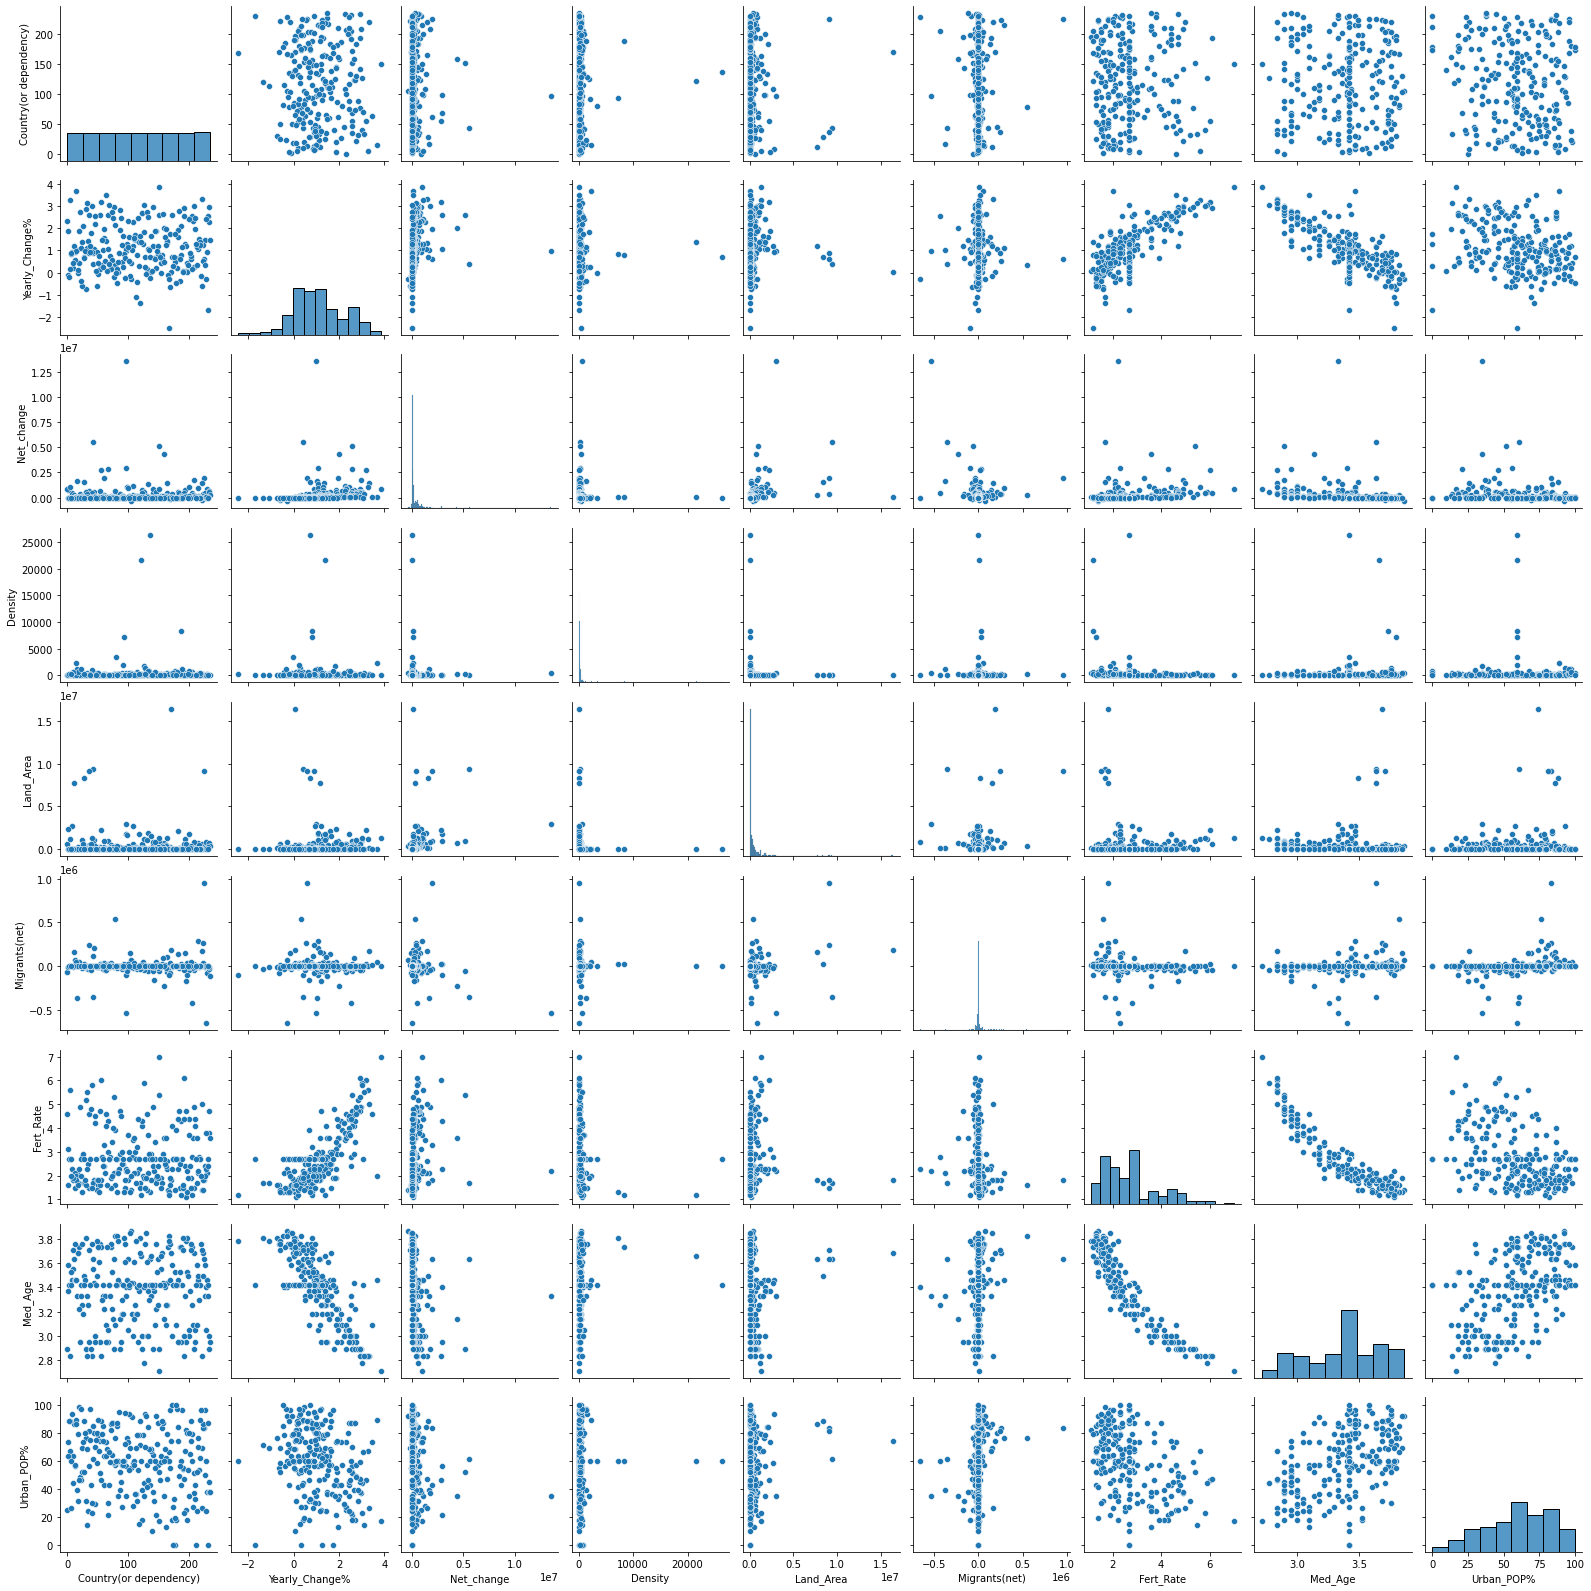

In [136]:
sns.pairplot(features)

<AxesSubplot:>

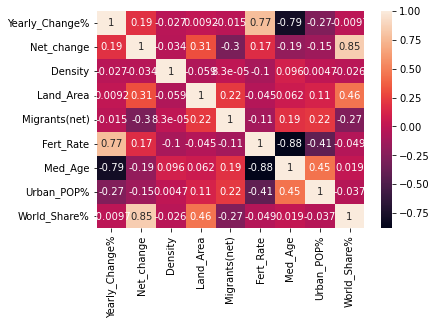

In [137]:
corr=df.corr()
sns.heatmap(corr,annot=True)

apply multiple regression model

In [138]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()

linreg.fit(xtrain,ytrain)

ypred=linreg.predict(xtest)

In [139]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)
print(f"the world population is:{mse}\n accuracy of model is:{r2}")


the world population is:8.81956960663216e-06
 accuracy of model is:0.9999166194413706


In [173]:
features.head()

,Country(or dependency),Population(2020),Yearly_Change%,Net_change,Density,Land_Area,Migrants(net),Fert_Rate,Med_Age,Urban_POP%
0,43,1439323776,0.39,5540090.0,153.0,9388211.0,-348399.0,1.7,3.637586,61.0
1,96,1380004385,0.99,13586631.0,464.0,2973190.0,-532687.0,2.2,3.332205,35.0
2,224,331002651,0.59,1937734.0,36.0,9147420.0,954806.0,1.8,3.637586,83.0
3,97,273523615,1.07,2898047.0,151.0,1811570.0,-98955.0,2.3,3.401197,56.0
4,158,220892340,2.00,4327022.0,287.0,770880.0,-233379.0,3.6,3.135494,35.0


In [166]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=1)
r.fit(xtrain,ytrain)
ytestpred=r.predict(xtest)
mse=mean_squared_error(ytest,ytestpred)
r2=r2_score(ytest,ytestpred)
print(f"the world population is:{mse}\n accuracy of model is:{r2}")

the world population is:8.681612937181352e-06
 accuracy of model is:0.9999179236891603


In [170]:
for i in range(0,50,10):
    r=Ridge(alpha=i)
    r.fit(xtrain,ytrain)
    ytestpred=r.predict(xtest)
    mse=mean_squared_error(ytest,ytestpred)
    r2=r2_score(ytest,ytestpred)
    print('when i is ',i)
    print(f"the world population is:{mse}\n accuracy of model is:{r2}")

when i is  0
the world population is:8.81956960661979e-06
 accuracy of model is:0.9999166194413707
when i is  10
the world population is:8.036326751135071e-06
 accuracy of model is:0.9999240242501931
when i is  20
the world population is:7.641819559893346e-06
 accuracy of model is:0.9999277539367262
when i is  30
the world population is:7.401852547898557e-06
 accuracy of model is:0.9999300225943143
when i is  40
the world population is:7.242780882284797e-06
 accuracy of model is:0.9999315264641099


In [171]:
def predictworldshare():
    country=int(input("enter Country(or dependency)"))
    population2020=eval(input("enter Population(2020)"))
    Yearly_Change=eval(input("enter Yearly_Change"))
    Net_change=eval(input("enter Net_change"))
    Density= eval(input("enter Density") )           
    Land_Area=eval(input("enter Land_Area"))
    Migrantsnet=eval(input("enter Migrants(net)"))
    Fert_Rate=eval(input("enter Fert_Rate"))
    medage=eval(input("enter med_age"))
    Urban_POP=eval(input("enter Urban_POP"))
                  
    newob=[country,population2020,Yearly_Change,Net_change,Density,Land_Area,Migrantsnet,Fert_Rate,medage,Urban_POP]
                  
    v=linreg.predict([newob])[0]
                  
    return v

In [175]:
predictworldshare()

enter Country(or dependency)158
enter Population(2020)1439323776
enter Yearly_Change0.39
enter Net_change5540090.0
enter Density153.0
enter Land_Area5540090.0
enter Migrants(net)-348399.0
enter Fert_Rate1.7
enter med_age3.637586
enter Urban_POP61.0


18.470931777752313

applying scalling

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features.iloc[:,:]=sc.fit_transform(features.iloc[:,:])

In [55]:
features

,Country(or dependency),Population(2020),Yearly_Change%,Net_change,Density,Land_Area,Migrants(net),Fert_Rate,Med_Age,Urban_POP%
0,-1.090833,10.427597,-0.665470,4.613382,-0.139881,5.245584,-3.063049e+00,-8.505776e-01,0.887481,0.066495
1,-0.309561,9.987702,-0.106485,11.760452,-0.006194,1.436644,-4.683295e+00,-4.218763e-01,-0.171511,-1.045999
2,1.577286,2.208627,-0.479142,1.413710,-0.190176,5.102614,8.394628e+00,-7.648373e-01,0.887481,1.007836
3,-0.294820,1.782380,-0.031953,2.266676,-0.140741,0.746929,-8.699568e-01,-3.361360e-01,0.067740,-0.147446
4,0.604381,1.392082,0.834474,3.535915,-0.082280,0.129016,-2.051802e+00,7.784875e-01,-0.853656,-1.045999
...,...,...,...,...,...,...,...,...,...,...
230,0.324302,-0.245950,-0.972912,-0.307414,-0.184157,-0.328638,-1.124467e-18,-7.615266e-16,0.138891,-2.115705
231,-0.707568,-0.245962,1.812698,-0.307325,-0.205651,-0.321471,-1.124467e-18,-7.615266e-16,0.138891,0.280436
232,0.515935,-0.245975,-0.395294,-0.307407,-0.203071,-0.328543,-1.124467e-18,-7.615266e-16,0.138891,-0.575328
233,1.385653,-0.245977,0.154375,-0.307402,-0.147189,-0.328691,-1.124467e-18,-7.615266e-16,0.138891,-2.543587


In [56]:
target

0      18.47
1      17.70
2       4.25
3       3.51
4       2.83
       ...  
230     0.00
231     0.00
232     0.00
233     0.00
234     0.00
Name: World_Share%, Length: 235, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,shuffle=True)

In [58]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()

linreg.fit(xtrain,ytrain)

ypred=linreg.predict(xtest)

In [59]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)

print(f"the world population is:{mse}\n accuracy of model is:{r2}")

the world population is:9.074043514088391e-06
 accuracy of model is:0.9999984244922971


changes apply at the time of with df  with scalling

In [60]:
df=pd.read_csv("worldpopulation2022")


In [61]:
df["Land_Area"]=df["Land_Area"].str.replace(",","")
df["Land_Area"]=df["Land_Area"].astype("float64")

In [62]:
df["Fert_Rate"].replace("N.A.",np.nan,inplace=True)
df["Fert_Rate"]=df["Fert_Rate"].astype("float64")

In [63]:
df["Med_Age"].replace("N.A.",np.nan,inplace=True)
df["Med_Age"]=df["Med_Age"].astype("float64")


In [64]:
df["Migrants(net)"]=df["Migrants(net)"].str.replace(",","")
df["Migrants(net)"].replace(' ',np.nan,inplace=True)
df["Migrants(net)"]=df["Migrants(net)"].astype("float64")

In [65]:
df["Density"]=df["Density"].str.replace(",","")
df["Density"]=df["Density"].astype("float64")

In [66]:
df["Net_change"]=df["Net_change"].str.replace(",","")
df["Net_change"]=df["Net_change"].astype("float64")

In [67]:
df["Yearly_Change"]=df["Yearly_Change"].str[:-1]
df["Yearly_Change"]=df["Yearly_Change"].astype("float64")

In [68]:
df["World_Share"]=df["World_Share"].str[:-1]
df["World_Share"]=df["World_Share"].astype("float64")

In [69]:
df["Urban_POP%"]=df["Urban_POP%"].str[:-1]
df["Urban_POP%"].replace("N.A",np.nan,inplace=True)
df["Urban_POP%"]=df["Urban_POP%"].astype("float64")

In [70]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy="mean")
df[["Urban_POP%","Med_Age","Fert_Rate","Migrants(net)"]]=si.fit_transform(df[["Urban_POP%","Med_Age","Fert_Rate","Migrants(net)"]])

In [71]:
df.rename(columns={'World_Share':'World_Share%'},inplace=True)
df.rename(columns={'Yearly_Change':'Yearly_Change%'},inplace=True)

In [72]:
df["Population(2020)"]=df["Population(2020)"].str.replace(",","")


In [73]:
df.drop(["Unnamed: 0","Sr_No."],axis=1,inplace=True)

In [74]:
from scipy.stats import skew

In [75]:
df["Med_Age"]=np.log(df["Med_Age"])

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
lab=LabelEncoder()
df["Country(or dependency)"]=lab.fit_transform(df["Country(or dependency)"])

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df.iloc[:,:]=sc.fit_transform(df.iloc[:,:])

In [79]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1]

In [80]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,shuffle=True)

In [83]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()

linreg.fit(xtrain,ytrain)

ypred_train=linreg.predict(xtrain)

ypred_test=linreg.predict(xtest)

In [86]:
train = linreg.score(xtrain,ytrain)
test= linreg.score(xtest,ytest)

print(f"{train} {test}")

0.9999982068036639 0.9999796216501399


In [95]:
mse=mean_squared_error(ytrain,ypred_train)
r2=r2_score(ytrain,ypred_train)

print(f"the world population is:{mse}\n accuracy of model is:{r2}")

the world population is:2.210379547435465e-06
 accuracy of model is:0.9999984332675199


In [87]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(ytest,ypred_test)
r2=r2_score(ytest,ypred_test)

print(f"{mse}\n accuracy of model is:{r2}")

3.0891137897473475e-06
 accuracy of model is:0.9999796216501399
